In [2]:
import numpy as np
import skimage.io
import skimage
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import KMeans

In [81]:
im = skimage.transform.rescale(skimage.io.imread('coins.pgm', as_gray=True),0.2)
shape = im.shape
im = im.ravel()

/home/serizba/anaconda3/envs/vision/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


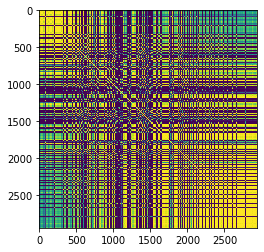

In [82]:
d_sq = scipy.spatial.distance.cdist(im.reshape((-1,1)), im.reshape((-1,1)), 'sqeuclidean')

# Affinity Matrix
l = 100.0
W = np.exp(-l * d_sq)

plt.imshow(W)

[-0.01844278 -0.01844278 -0.01844278 ... -0.01844278 -0.01844278
 -0.01844278]


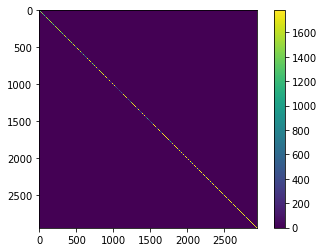

In [88]:
# Build the Graph Laplacian
D = np.diag(np.sum(W, axis=0))
L = (D - W)

# Compute K smallest eigenvalues of L
w, v = scipy.sparse.linalg.eigsh(L, k=2, which='SM')
plt.imshow(L)
plt.colorbar()
print(v[:, 0])

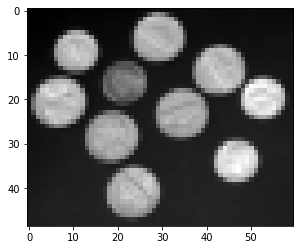

In [166]:
plt.imshow(im.reshape(shape), 'gray')

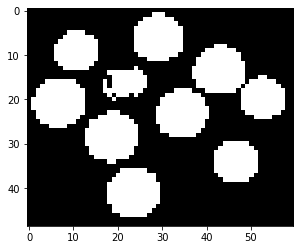

In [170]:
th = 0.0
plt.imshow(((v[:,1]>th)*1.0).reshape(shape), cmap='gray')

# Let's try with multilabel (and with color images)

In [171]:
im = skimage.transform.rescale(skimage.io.imread('sheep.ppm'),0.25)
shape = im.shape[:2]

In [172]:
d_sq = scipy.spatial.distance.cdist(im.reshape((-1, 3)), im.reshape((-1, 3)), 'sqeuclidean')

# Affinity Matrix
l = 100.0
W = np.exp(-l * d_sq)

In [173]:
# Build the Graph Laplacian
D = np.sum(W, axis=0)

sqrtD = np.diag(D**(-0.5))

L = sqrtD @ (np.diag(D) - W) @ sqrtD

# Compute K smallest eigenvalues of L
w, v = scipy.sparse.linalg.eigsh(L, k=4, which='SM')

In [174]:
# Perform K-Means

labels = KMeans(n_clusters=3, random_state=0).fit_predict(sqrtD @ v[:, 1:]).reshape(shape)

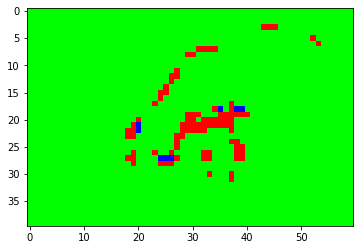

In [177]:
res = np.zeros(shape+(3,))
res[:,:,0] = 1. * (labels==0)
res[:,:,1] = 1. * (labels==1)
res[:,:,2] = 1. * (labels==2)
plt.imshow(res)

# Let's try with Local Neighborhood

In [75]:
im = skimage.transform.rescale(skimage.io.imread('horses.png')[:,:,:3],0.25)
shape = im.shape[:2]

/home/serizba/anaconda3/envs/vision/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


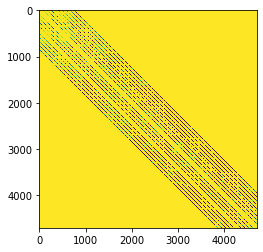

In [76]:
d_sq = scipy.spatial.distance.cdist(im.reshape((-1, 3)), im.reshape((-1, 3)), 'sqeuclidean')
for p in range(d_sq.shape[0]):
    dp = d_sq[p].reshape(shape)
    i, j = p // shape[1], p % shape[1]
    mask = np.zeros_like(dp)
    mask[max(0,i-10):min(shape[0],i+10), max(0,j-10):min(shape[1],j+10)] = 1.0
    d_sq[p] = (mask * dp).ravel()
    

# Affinity Matrix
l = 100.0
W = np.exp(-l * d_sq)

plt.imshow(W)

In [77]:
# Build the Graph Laplacian
D = np.sum(W, axis=0)

sqrtD = np.diag(D**(-0.5))

L = sqrtD @ (np.diag(D) - W) @ sqrtD

# Compute K smallest eigenvalues of L
num_classes = 3
w, v = scipy.sparse.linalg.eigsh(L, k=num_classes+1, which='SM')

In [78]:
# Perform K-Means
labels = KMeans(n_clusters=num_classes, n_init=100, max_iter=5000).fit_predict(sqrtD @ v[:, 1:]).reshape(shape)

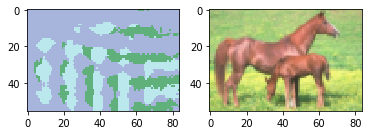

In [79]:
res = np.zeros(shape+(3,))

for i in range(num_classes):
    res[labels==i] = np.random.choice(range(256), size=3) / 255.0

plt.subplot(1,2,1)
plt.imshow(res)
plt.subplot(1,2,2)
plt.imshow(im)

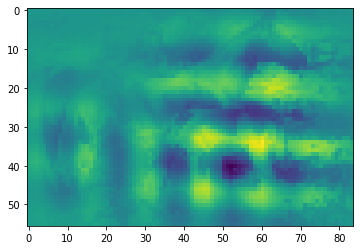

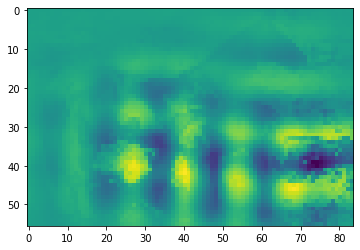

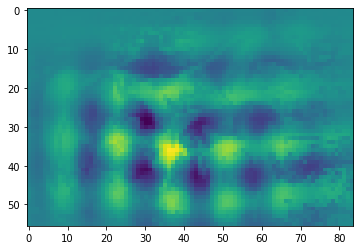

In [80]:
res = np.zeros(shape+(3,))
for i in range(3):
    #plt.subplot(1,3,i+1)
    plt.imshow(v[:,i+1].reshape(shape))
    plt.show()
